# Outliers

1. Drop outliers 
2. Fill with a value
3. Truncate 

In [6]:
import pandas as pd
from matplotlib.pyplot import figure, show
from sklearn.impute import SimpleImputer
import dslabs_functions as dslabs
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import savefig
from sklearn.impute import KNNImputer

filename = 'data_preparation_csvs/mv_imputation_csvs/data_mv_alt3.csv'
data_imputed: pd.DataFrame = pd.read_csv(filename, sep=',', decimal='.', na_values='')
print(f"Dataset nr records={data_imputed.shape[0]}", f"nr variables={data_imputed.shape[1]}")
outlier_vars = ["Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate", "NumofLoan", "Delay_from_due_date", "NumofDelayedPayment", "ChangedCreditLimit", "NumCreditInquiries", "OutstandingDebt", "CreditUtilizationRatio", "Credit_History_Age", "TotalEMIpermonth", "Amountinvestedmonthly", "MonthlyBalance"]
print(f"Original data: {data_imputed.shape}")

Dataset nr records=100000 nr variables=32
Original data: (100000, 32)


In [7]:
# Save to file
def save(df, name, file_tag):
    df.to_csv(f'data_preparation_csvs/outliers_treatment_csvs/data_outliers_{name}.csv', index=False)

    ## Separate into Train and Test and save in different files
    train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

    ## Save the training and testing sets to CSV files
    train_data.to_csv(f'data_preparation_csvs/outliers_treatment_csvs/train_data_outliers_{name}.csv', index=False)
    test_data.to_csv(f'data_preparation_csvs/outliers_treatment_csvs/test_data_outliers_{name}.csv', index=False)

    ## Evaluate Approach
    target = "Credit_Score"

    figure()
    eval: dict[str, list] = dslabs.evaluate_approach(train_data, test_data, target=target, metric="recall")
    dslabs.plot_multibar_chart(
        ["NB", "KNN"], eval, title=f"{file_tag}", percentage=True
    )
    savefig(f"data_preparation_images/outliers_treatment_result/data_outliers_{name}.png")
    show()

In [8]:
data_imputed.shape

(100000, 32)

In [9]:
# Drop outliers
file_tag = "Credit_Score Approach 1 Outliers Treatment"
n_std: int = 3.5
numeric_vars: list[str] = outlier_vars
if numeric_vars is not None:
    df_copy: pd.DataFrame = data_imputed.copy(deep=True)
    summary5: pd.DataFrame = df_copy[numeric_vars].describe()
    for var in numeric_vars:
        top_threshold, bottom_threshold = dslabs.determine_outlier_thresholds_for_var(
            summary5[var],
            std_based=True,
            threshold=n_std,
        )
        outliers: pd.Series = df_copy[(df_copy[var] > top_threshold) | (df_copy[var] < bottom_threshold)]
        df_copy.drop(outliers.index, axis=0, inplace=True)
    save(df_copy, "alt1_drop", file_tag)
    print(f"Data after dropping outliers: {df_copy.shape}")
else:
    print("There are no numeric variables")

KeyboardInterrupt: 

<Figure size 600x450 with 0 Axes>

Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)


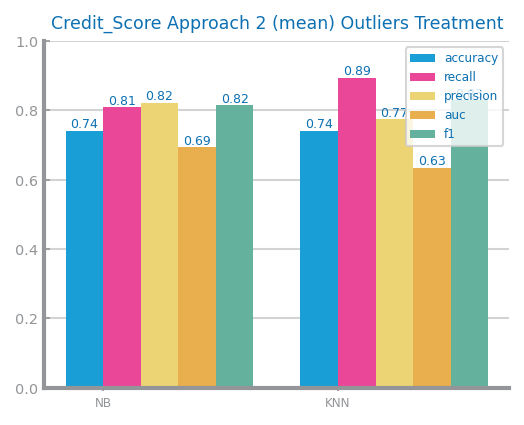

Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)


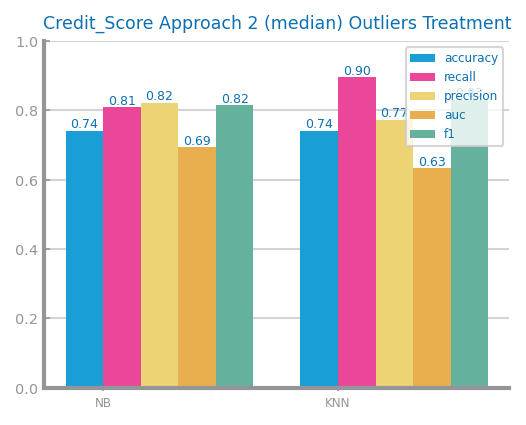

Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)
Data after replacing outliers: (100000, 32)


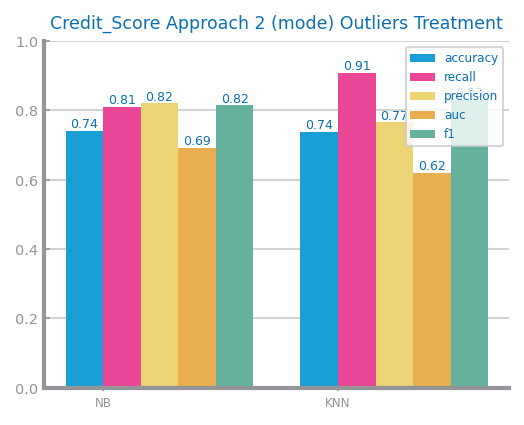

In [11]:
# Fill with values - [mean, median, mode] - Moda ganha
for strategy in ["mean", "median", "mode"]:
    file_tag = f"Credit_Score Approach 2 ({strategy}) Outliers Treatment"
    data_copy_2: pd.DataFrame = data_imputed.copy(deep=True)
    summary5: pd.DataFrame = data_copy_2[outlier_vars].describe()
    for var in outlier_vars:
        top, bottom = dslabs.determine_outlier_thresholds_for_var(summary5[var])
        if strategy == "mean":
            stat: float = data_copy_2[var].mean()
        if strategy == "median":
            stat: float = data_copy_2[var].median()
        if strategy == "mode":
            stat: int | float = data_copy_2[var].mode()[0]
        data_copy_2[var] = data_copy_2[var].apply(lambda x: stat if x > top or x < bottom else x)
        print("Data after replacing outliers:", data_copy_2.shape)
        #print(summary5)
    save(data_copy_2, f"alt2_fill_{strategy}", file_tag)

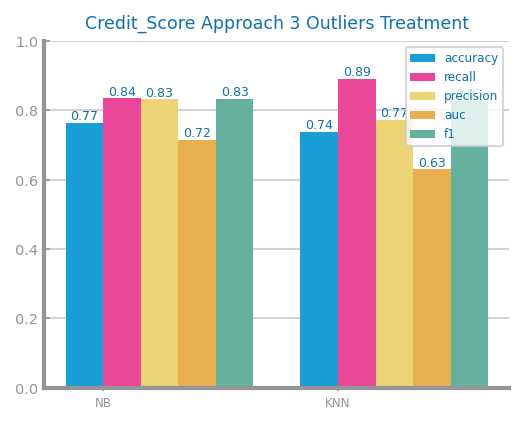

In [16]:
# Truncate - replace outliers with "max" and "min" - Analysis
file_tag = "Credit_Score Approach 3 Outliers Treatment"
numeric_vars: list[str] = outlier_vars
if [] != numeric_vars:
    data_copy_3: pd.DataFrame = data_imputed.copy(deep=True)
    for var in numeric_vars:
        top, bottom = dslabs.determine_outlier_thresholds_for_var(summary5[var], std_based=True, threshold=2.5)
        data_copy_3[var] = data_copy_3[var].apply(
            lambda x: top if x > top else bottom if x < bottom else x
        )
    save(data_copy_3, "alt3_truncate", file_tag)
else:
    print("There are no numeric variables")